# Problem: 
Was Shopify Stock Price Affected by Covid-19 in Year 2020?

# Data Sets:
Alpha Vantage: https://www.alphavantage.co/documentation/ <br>
Selected Company: Shopify Inc  (NYSE: SHOP)

# Plan:
1) Data acquisition: Shopify data <br>
2) Basic Exploration <br>
3) Data cleaning <br>
4) Use year 2018 and 2019 Shopify stock price to build a model, forecast the stock price for 2020 <br>
5) Compare 2020 actual with forecast <br>
6) Conclusion<br>


### Set up environment

In [1]:
# Basic Libraries
import time
import datetime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
# alpha vantage
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.fundamentaldata import FundamentalData

# API key
api_key = 'AFJV69CXJD6H83JK'

### Data of SHOP stock

In [2]:
# Get the data for Shopify Stock
ts = TimeSeries(api_key, output_format='pandas')
ShopifyData, meta_data = ts.get_daily_adjusted(symbol='SHOP', outputsize='full',)

# preview ShopifyData
ShopifyData.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2021-04-19,1192.00,1202.34,1143.15,1145.78,1145.78,930859.0,0.0,1.0
2021-04-16,1211.00,1219.19,1187.82,1207.80,1207.80,734530.0,0.0,1.0
2021-04-15,1200.00,1221.97,1187.00,1208.34,1208.34,954514.0,0.0,1.0
2021-04-14,1248.00,1250.00,1176.02,1179.86,1179.86,1316518.0,0.0,1.0
2021-04-13,1215.05,1248.21,1215.05,1241.54,1241.54,1092300.0,0.0,1.0


In [3]:
# Take a look at the datatypes of the various components
ShopifyData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1488 entries, 2021-04-19 to 2015-05-21
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1. open               1488 non-null   float64
 1   2. high               1488 non-null   float64
 2   3. low                1488 non-null   float64
 3   4. close              1488 non-null   float64
 4   5. adjusted close     1488 non-null   float64
 5   6. volume             1488 non-null   float64
 6   7. dividend amount    1488 non-null   float64
 7   8. split coefficient  1488 non-null   float64
dtypes: float64(8)
memory usage: 104.6 KB


In [4]:
# Some statistic
ShopifyData.describe()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
count,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1.488000e+03,1488.0,1488.0
mean,289.873258,296.234446,282.814917,290.026452,290.026452,1.647704e+06,0.0,1.0
std,357.192159,364.736020,347.699223,356.893051,356.893051,1.477382e+06,0.0,0.0
min,19.390000,19.850000,18.480000,19.330000,19.330000,1.039430e+05,0.0,1.0
25%,42.742500,43.477500,41.893750,42.620000,42.620000,8.215758e+05,0.0,1.0
50%,135.000000,138.340000,131.390000,135.185000,135.185000,1.324293e+06,0.0,1.0
75%,337.732500,349.754975,329.780000,338.982500,338.982500,2.039504e+06,0.0,1.0
max,1475.630000,1499.750000,1438.030000,1474.000000,1474.000000,2.087492e+07,0.0,1.0


In [5]:
#change shopify column name and drop unnecessary columns
ShopifyData.columns = ['Open','High','Low','Close','Adjusted close','Volume','aividend amount','Split coefficient']
ShopifyData = ShopifyData.loc[:,'Open':'Volume']
ShopifyData.head()

,Open,High,Low,Close,Adjusted close,Volume
date,,,,,,
2021-04-19,1192.00,1202.34,1143.15,1145.78,1145.78,930859.0
2021-04-16,1211.00,1219.19,1187.82,1207.80,1207.80,734530.0
2021-04-15,1200.00,1221.97,1187.00,1208.34,1208.34,954514.0
2021-04-14,1248.00,1250.00,1176.02,1179.86,1179.86,1316518.0
2021-04-13,1215.05,1248.21,1215.05,1241.54,1241.54,1092300.0


In [6]:
ShopifyData.columns

Index(['Open', 'High', 'Low', 'Close', 'Adjusted close', 'Volume'], dtype='object')

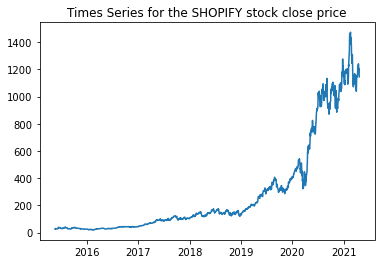

In [7]:
# Shopify close price time series plot overtime
plt.title('Times Series for the SHOPIFY stock close price')
plt.plot(ShopifyData['Close'])

### Get 2018, 2019 and 2020 Data for SHOP stock

In [8]:
#get 2018 2019 SHOP stock
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2019, 12, 31)

# Create a filtered dataframe, and change the order it is displayed. 
SHOP1819Data = ShopifyData[(ShopifyData.index >= start_date) & (ShopifyData.index <= end_date)]
SHOP1819Data = SHOP1819Data.sort_index(ascending=True)
SHOP1819Data.sort_index(inplace = True)

# Preview 2018,2019 SHOP data
SHOP1819Data.info()
print(SHOP1819Data)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2018-01-02 to 2019-12-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            503 non-null    float64
 1   High            503 non-null    float64
 2   Low             503 non-null    float64
 3   Close           503 non-null    float64
 4   Adjusted close  503 non-null    float64
 5   Volume          503 non-null    float64
dtypes: float64(6)
memory usage: 27.5 KB
              Open      High       Low   Close  Adjusted close     Volume
date                                                                     
2018-01-02  101.59  105.7200  101.0200  105.49          105.49  1395289.0
2018-01-03  106.36  108.1200  106.1700  107.75          107.75  1162802.0
2018-01-04  108.33  110.0600  107.2100  109.95          109.95  1160999.0
2018-01-05  110.55  111.7700  109.0200  110.58          110.58   771047.0
2018-01-08  109.99  112.6900  10

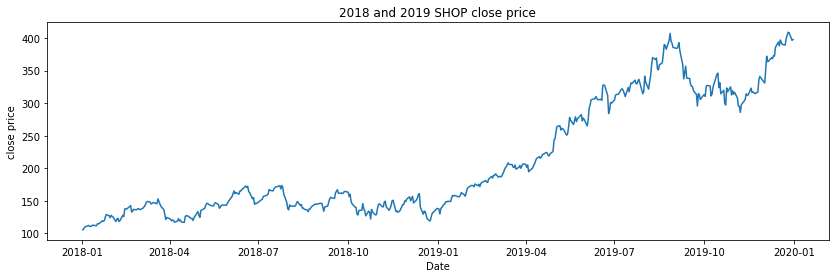

In [9]:
# plot the graph of 2018,2019 SHOP close price
fig, ax = plt.subplots(figsize=(14, 4))
# plt.subplot(1, 2, 1)
plt.xlabel("Date")
plt.ylabel("close price")
plt.title("2018 and 2019 SHOP close price")
plt.plot(SHOP1819Data['Close'], label = '1')

In [10]:
# get 2020 SHOP Stock
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2020, 12, 31)

# Create a filtered dataframe, and change the order it is displayed. 
SHOP2020Data = ShopifyData[(ShopifyData.index >= start_date) & (ShopifyData.index <= end_date)]
SHOP2020Data = SHOP2020Data.sort_index(ascending=True)

SHOP2020Data = SHOP2020Data.loc[:,'Open':'Volume']
SHOP2020Data.sort_index(inplace = True)

# Preview 2020 SHOP data
SHOP2020Data.info()
print(SHOP2020Data)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            253 non-null    float64
 1   High            253 non-null    float64
 2   Low             253 non-null    float64
 3   Close           253 non-null    float64
 4   Adjusted close  253 non-null    float64
 5   Volume          253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB
               Open       High        Low    Close  Adjusted close     Volume
date                                                                         
2020-01-02   403.99   408.2400   398.3600   407.81          407.81  1396103.0
2020-01-03   401.60   408.4028   397.0000   404.29          404.29  1031684.0
2020-01-06   398.59   413.5199   395.4200   413.33          413.33  1685997.0
2020-01-07   415.75   422.4800   410.1200   414.50          414.50  1553231.0
2020-01-

## Time series model for 2019 Data

In [11]:
df_close = SHOP1819Data['Close']
df_close.shape

(503,)

In [12]:
df_close.head()

date
2018-01-02    105.49
2018-01-03    107.75
2018-01-04    109.95
2018-01-05    110.58
2018-01-08    112.35
Name: Close, dtype: float64

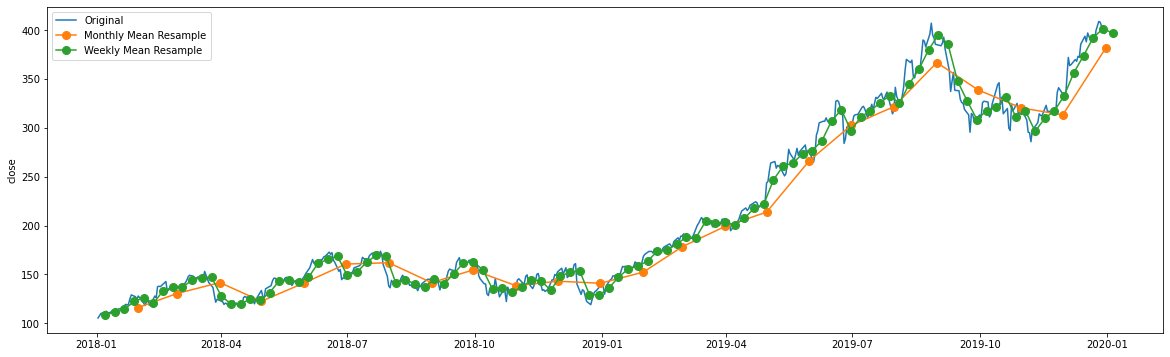

In [13]:
# general trend using the mean, both the weekly average resample data as well as the monthly average resample data.
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df_close,label='Original')
ax.plot(df_close.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(df_close.resample('W').mean(),marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('close')
ax.legend();

By looking at the graph above, we can see a general increasing trend with no clear pattern of seasonal or cyclical changes. 

In [14]:
# Aggrefating weekly data
y = df_close.resample('W').mean()
y.head()

date
2018-01-07    108.4425
2018-01-14    111.6020
2018-01-21    114.2775
2018-01-28    122.3520
2018-02-04    126.1660
Freq: W-SUN, Name: Close, dtype: float64

### Decompose the Data
### Abstraction used to inform forecasting models.

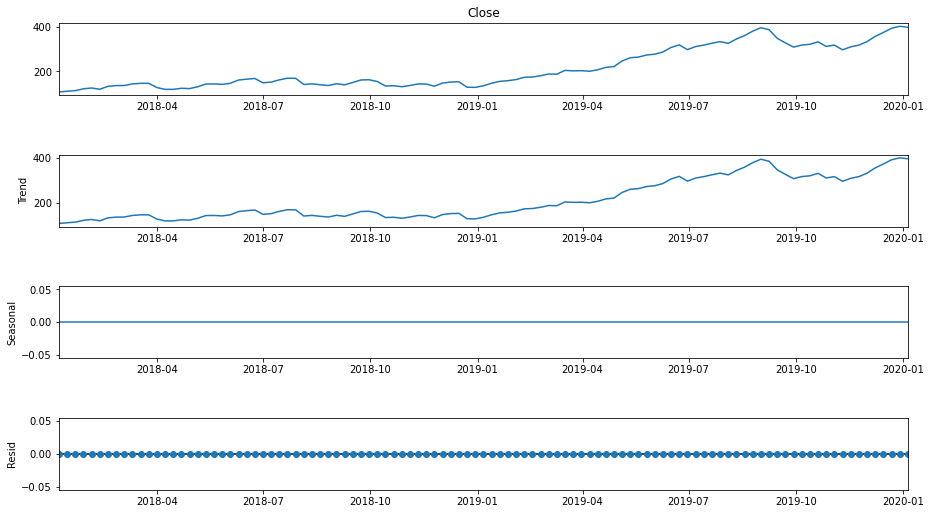

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y, period=1)
fig = decomposition.plot()
fig.set_size_inches(15, 8)

After looking at the decomposed graphs, we can tell that our data has an increasing trend.

### ACF and PACF
##### ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. To check how strong are the data correlated.
##### PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals. With consideration of inflences of other matters.

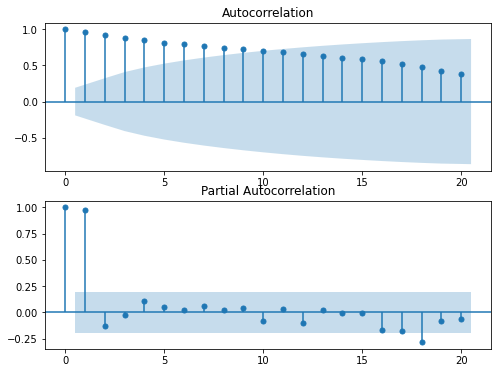

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
nlags = 20
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(211)
fig = plot_acf(y, lags=nlags, ax=ax1)
ax2 = fig1.add_subplot(212)
fig1 = sm.graphics.tsa.plot_pacf(y, lags=nlags, ax=ax2)
plt.show(fig1)

In [17]:
#There are five significant ACF values,three PACF values. ACF Lag values are increasing the auto correlation is decreasing. In PACF, the correlation become less after lag value 2. 
#The partial auto correlation at lag k is the correlation that results after removing the affect of any correlations due to the terms at shorter lags.

### Check for Stationarity

#### Rolling Statistics

In [18]:
#plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=4).mean() 
    rolstd = pd.Series(timeseries).rolling(window=4).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std');
    ax.legend()


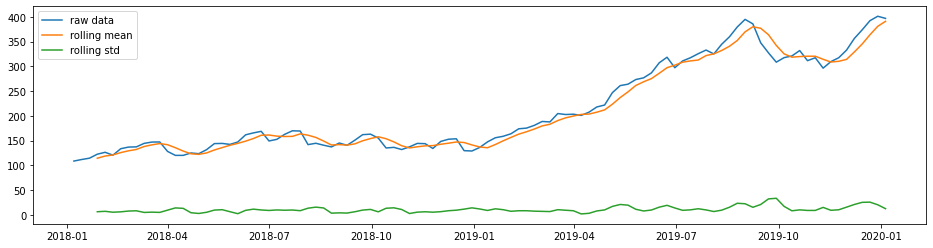

In [19]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

The rolling mean is not constant over time, we can conclude that the data is not stationary. 

#### Augmented Dickey-Fuller Test(ADF Test) 
### It is unit root test for stationarity. Unit roots can cause unpredictable results in your time series analysis.

In [20]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [21]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = 0.343
P-value = 0.979
Critical values :
	1%: -3.4968181663902103 - The data is not stationary with 99% confidence
	5%: -2.8906107514600103 - The data is not stationary with 95% confidence
	10%: -2.5822770483285953 - The data is not stationary with 90% confidence


Since P-value is greater than the significance level and the ADF statistic is also significantly higher than the critical values, we do not reject the null hypothesis and must conclude that the time series is not stationary.

### Make the Data Stationary

#### Detrending

In [22]:
df_close = SHOP1819Data['Close']
df_close = df_close.reset_index(drop=True)

 > Is the de-trended data stationary ?
Test statistic = -5.982
P-value = 0.000
Critical values :
	1%: -3.4968181663902103 - The data is  stationary with 99% confidence
	5%: -2.8906107514600103 - The data is  stationary with 95% confidence
	10%: -2.5822770483285953 - The data is  stationary with 90% confidence


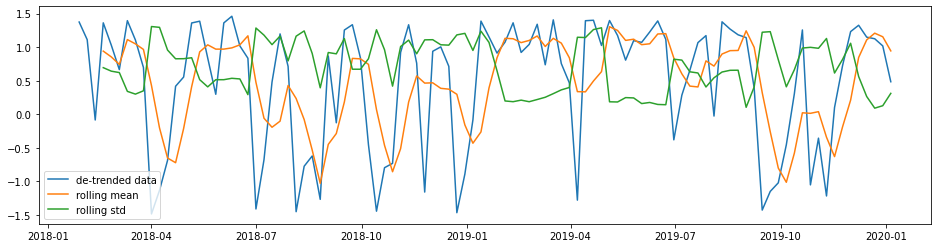

In [23]:
# Detrending
# Differencing
y_detrend =  (y - y.rolling(window=4).mean())/y.rolling(window=4).std()
# y_detrend = y - y.shift()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

The results show that the data is now stationary.

### Build Time Series Prediction Model

To evaluate the performance of a forecasting model, we will to measure the differences between predicted values and the actual or observed values. The commonly-used measurement metric root-mean-square error (RMSE), forecast error, mean absolute error (MAE), and mean absolute percentage error (MAPE).

We will try below forecasting models:

1. Simple Exponential Smoothing (SES) for data without trend or seasonality
2. Holt’s Linear Trend Method for data with a trend but no seasonality
4. ARIMA for data with trend and/or seasonality

#### Simple Exponential Smoothing (SES)

This model calculates the forecasting data using weighted averages. One important parameter this model uses is the smoothing parameter: α, and we can pick a value between 0 and 1 to determine the smoothing level. When α = 0, the forecasts are equal to the average of the historical data. When α = 1, the forecasts will be equal to the value of the last observation.

In [24]:
df = y_detrend.copy()
df.dropna(inplace=True)
size = int(len(df) * 0.8) 
train, test = df[0:size], df[size:len(df)] 
df.shape,train.shape,test.shape

((102,), (81,), (21,))

In [25]:
no_of_data_points = len(test)# the number of data points for the test set
no_of_data_points

21

In [26]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 

def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):

    plt.figure(figsize=(14, 7))
    plt.plot(y,marker='o', color='black',label='Close')
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    plt.plot(fcast1,marker='o', color='blue',label=r'$\alpha={}$'.format(smoothing_level))
    fit1.fittedvalues.plot(marker='o', color='blue',label="")
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    fit2.fittedvalues.plot(marker='o', color='green',label="")
    plt.plot(fcast2,marker='o', color='green',label=r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    plt.legend()
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))

The Root Mean Squared Error of our forecasts with smoothing level of 0.05 is 1.06
The Root Mean Squared Error of our forecasts with auto optimization is 1.09


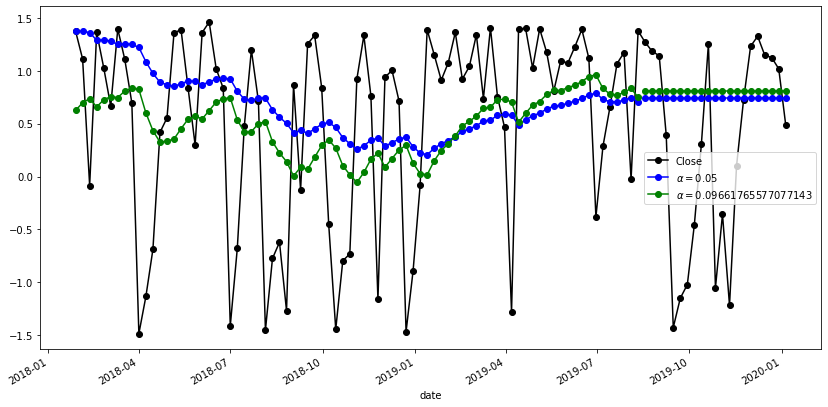

In [27]:
ses(df,train, test,0.05,no_of_data_points)

As we can see from the graph, SES will predict a flat, forecasted line since the logic behind it uses weighted averages. Even though the RMSE is low, it does not predict any fluctuation. Since most time series data has some kind of trend or seasonality, this model can be used to get a sense of a baseline for comparison. 

#### Holt’s Linear Trend Method

Expanding the SES method, the Holt method helps us forecast time series data that has a trend. In addition to the level smoothing parameter α introduced with the SES method, the Holt method adds the trend smoothing parameter β*. Like with parameter α, the range of β* is also between 0 and 1.

Below we will try two different variants within the Holt method. Both fits have the α = 0.6, β* = 0.2 as parameter values. The fit1 is the default Holt’s additive model, and the fit2 is an exponential model.

In [28]:
df = y.copy()
df.dropna(inplace=True)
size = int(len(df) * 0.8) 
train, test = df[0:size], df[size:len(df)] 
df.shape,train.shape,test.shape

((105,), (84,), (21,))

In [29]:
from statsmodels.tsa.api import Holt

def holt(y,y_to_train,y_to_test,smoothing_level,smoothing_slope, predict_date):
    plt.figure(figsize=(14, 7))
    plt.plot(y,marker='o', color='black',label='Close')
    
    fit1 = Holt(y_to_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    plt.plot(fcast1,marker='o', color='blue',label="Holt's linear trend")
    fit1.fittedvalues.plot(marker="o", color='blue',label="")
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    fit2 = Holt(y_to_train, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    

    fit2.fittedvalues.plot(marker="o", color='red',label="")
    plt.plot(fcast2,marker='o', color='red',label="Exponential trend")
    plt.legend()

The Root Mean Squared Error of Holts Linear trend 93.31
The Root Mean Squared Error of Holts Exponential trend 114.79


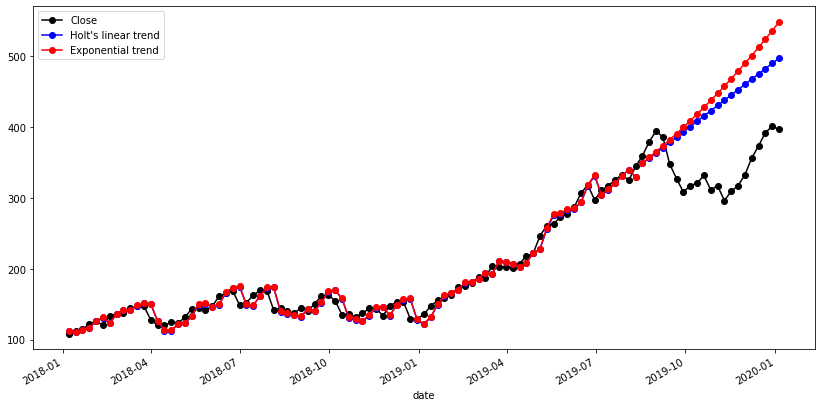

In [30]:
holt(df, train,test,0.8,0.5,no_of_data_points)

We Can see that RMSE is quite high

#### ARIMA Model

In [31]:
df = SHOP1819Data['Close']
size = int(len(df) * 0.8) 
train, test = df[0:size], df[size:len(df)] 
df.shape,train.shape,test.shape

((503,), (402,), (101,))

In [32]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
import pmdarima as pm

model = pm.auto_arima(df, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3337.807, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3339.348, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3339.256, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3339.582, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3337.748, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3338.450, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3338.718, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3337.368, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3338.880, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3340.654, Time=0.48 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3339.672, Time=0.06 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 1.605 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  

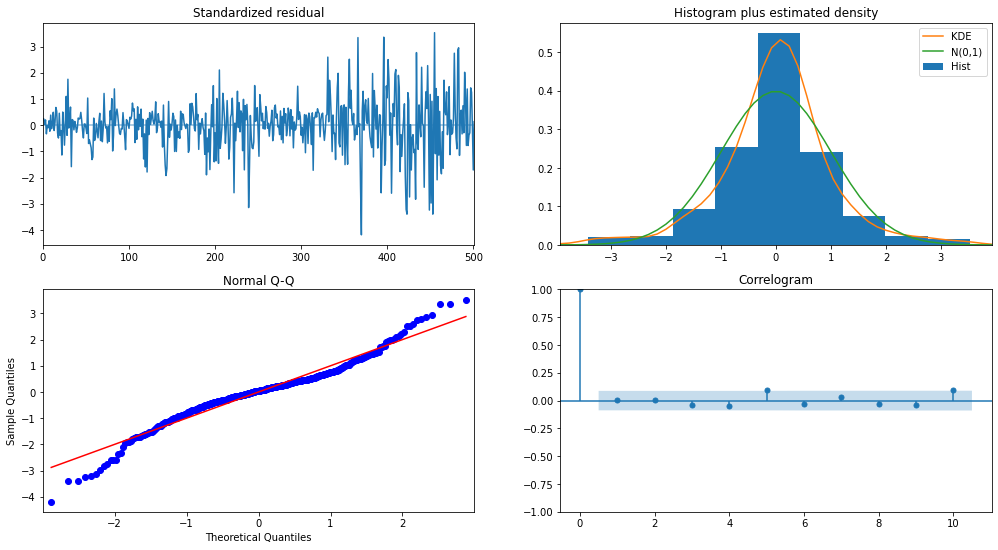

In [33]:
model.plot_diagnostics(figsize=(17,9))
plt.show()

The residual errors seem to fluctuate around a mean of zero and have a uniform variance.
The density plot suggest normal distribution with mean zero.
In Q-Q plot, significant deviations shows the distribution is skewed.
The Correlogram shows the residual errors are not autocorrelated.

Let’s plot the actuals against the fitted values.

### Forecast

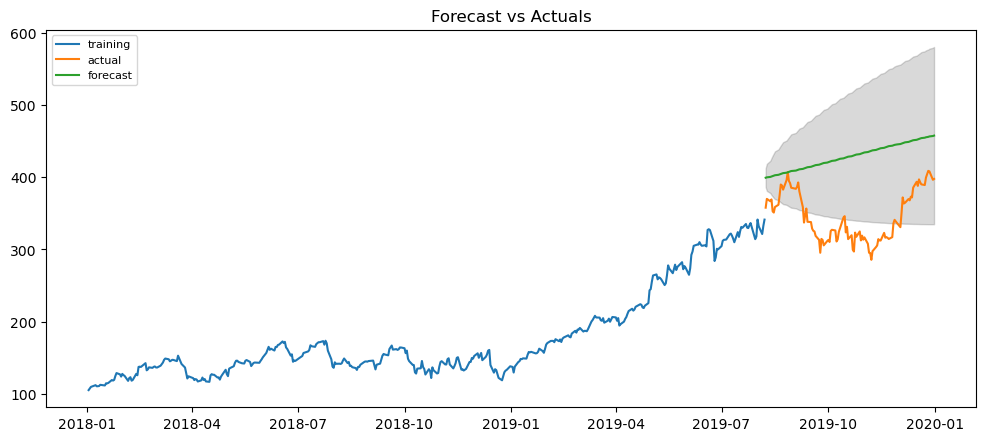

In [34]:
# Forecast
n_periods = 101
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(confint[:, 0], index=test.index)
upper_series = pd.Series(confint[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [35]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                      # ACF1
    return({'mape':mape, 'mae': mae, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [36]:
forecast_accuracy(fc, test.values)

{'mape': 0.25443797515894534,
 'mae': 83.64707286147623,
 'rmse': 91.71034744137287,
 'acf1': 0.9566482702863692,
 'corr': 0.011125164972575052,
 'minmax': 0.1939503864576575}

From the above models we can see that ARIMA model is giving the best result

### Predict 2020

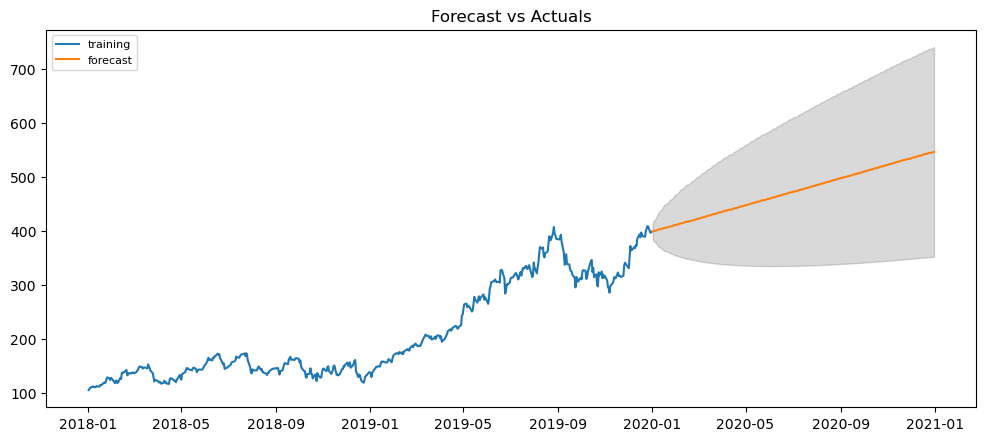

In [37]:
# Forecast
n_periods = len(SHOP2020Data)
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Make as pandas series
fc_series = pd.Series(fc, index=SHOP2020Data.index)
lower_series = pd.Series(confint[:, 0], index=SHOP2020Data.index)
upper_series = pd.Series(confint[:, 1], index=SHOP2020Data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='training')
# plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Compare 2020 actual with forecast

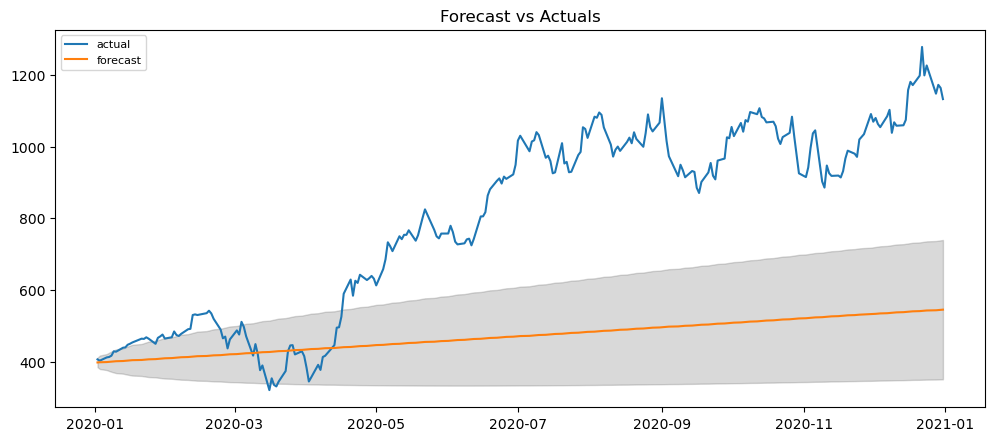

In [38]:
# Forecast
n_periods = len(SHOP2020Data)
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Make as pandas series
fc_series = pd.Series(fc, index=SHOP2020Data.index)
lower_series = pd.Series(confint[:, 0], index=SHOP2020Data.index)
upper_series = pd.Series(confint[:, 1], index=SHOP2020Data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(SHOP2020Data['Close'], label='actual')
# plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### END